中文初始化

In [2]:
# 從 Google API 上下載字體放到暫存資料夾底下
!wget 'https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip'
!mkdir /tmp/fonts
!unzip -o NotoSansCJKtc-hinted.zip -d /tmp/fonts/
!mv /tmp/fonts/NotoSansMonoCJKtc-Regular.otf /usr/share/fonts/truetype/NotoSansMonoCJKtc-Regular.otf -f
!rm -rf /tmp/fonts
!rm NotoSansCJKtc-hinted.zip

# 指定字體
import matplotlib.font_manager as font_manager
import matplotlib.pyplot as plt

font_dirs = ['/usr/share/fonts/truetype/']
font_files = font_manager.findSystemFonts(fontpaths=font_dirs)

for font_file in font_files:
  font_manager.fontManager.addfont(font_file)

plt.rcParams['font.family'] = "Noto Sans Mono CJK TC"


--2024-09-26 13:58:07--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansCJKtc-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 173.194.210.207, 173.194.215.207, 173.194.216.207, ...
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|173.194.210.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 121247366 (116M) [application/zip]
Saving to: ‘NotoSansCJKtc-hinted.zip’

NotoSansCJKtc-hinte 100%[===================>] 115.63M  41.0MB/s    in 2.8s    

2024-09-26 13:58:10 (41.0 MB/s) - ‘NotoSansCJKtc-hinted.zip’ saved [121247366/121247366]

Archive:  NotoSansCJKtc-hinted.zip
  inflating: /tmp/fonts/LICENSE_OFL.txt  
  inflating: /tmp/fonts/NotoSansCJKtc-Black.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Bold.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-DemiLight.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Light.otf  
  inflating: /tmp/fonts/NotoSansCJKtc-Medium.o

結算日時加權股價指數絕對不可能落在 21900 附近，試用不同執行價合約，組出符合此需求的三組不同寬度的買入 Strangle

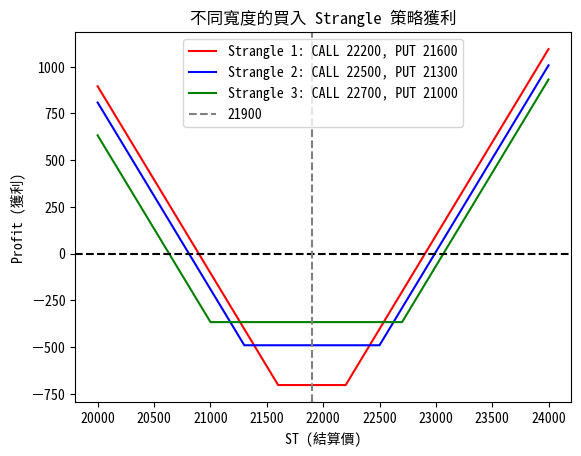

In [56]:
import numpy as np
import matplotlib.pyplot as plt

CALLprice = {21000:1060,21100:1000,21200:960,21300:890,21400:850,21500:755,21600:715,21700:650,21800:580,21900:515,22000:460,22100:407,22200:362,22300:312,22400:275,22500:236,22600:202,22700:175}
PUTprice = {21000:192,21100:211,21200:233,21300:255,21400:284,21500:310,21600:342,21700:373,21800:415,21900:455,22000:500,22100:540,22200:595,22300:650,22400:715,22500:765,22600:870,22700:1090}
T = 27/365   #到期天數(以年計算)
r = 0.01725   #無風險利率
ST = np.arange(20000,24000)  #履約價範圍

def OptionProfit(pos,ST):
  callpos = pos[0]
  putpos = pos[1]
  profit = np.zeros(ST.shape)
  for position in callpos:
    K = position[0]
    C = CALLprice[K]
    N = position[1]
    profit += (np.maximum(ST-K,0)-C)*N
  for position in putpos:
    K = position[0]
    P = PUTprice[K]
    N = position[1]
    profit += (np.maximum(K-ST,0)-P)*N
  return profit

pos1=[[[22200, 1]], [[21600, 1]]]
pos2=[[[22500, 1]], [[21300, 1]]]
pos3=[[[22700, 1]], [[21000, 1]]]

profit1 = OptionProfit(pos1, ST)
profit2 = OptionProfit(pos2, ST)
profit3 = OptionProfit(pos3, ST)

plt.plot(ST, profit1, label='Strangle 1: CALL 22200, PUT 21600', color='red')
plt.plot(ST, profit2, label='Strangle 2: CALL 22500, PUT 21300', color='blue')
plt.plot(ST, profit3, label='Strangle 3: CALL 22700, PUT 21000', color='green')

plt.axhline(0, color='black', linestyle='--')
plt.axvline(21900, color='gray', linestyle='--', label='21900')

plt.legend()
plt.xlabel('ST (結算價)')
plt.ylabel('Profit (獲利)')
plt.title('不同寬度的買入 Strangle 策略獲利')


plt.show()

套利空間

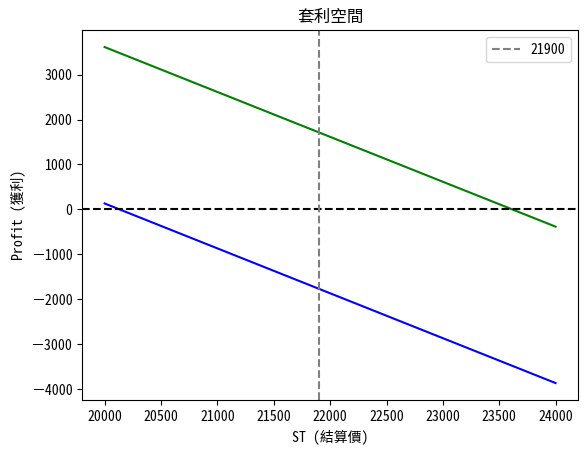

此套利可以獲得的最大 profit 為：3615.00


In [57]:
def ArbitrageProfit(K1, K2, ST):
    P1 = PUTprice[K1]
    C2 = CALLprice[K2]
    profit = (P1 - C2) + (np.maximum(K1 - ST, 0) - np.maximum(ST - K2, 0))
    return profit

K1 = 21000
K2 = 21000
profit_arbitrage_1 = ArbitrageProfit(K1, K2, ST)

K3 = 22700
K4 = 22700
profit_arbitrage_2 = ArbitrageProfit(K3, K4, ST)

best_profit = -np.inf
best_K1, best_K2 = None, None
for K1 in PUTprice.keys():
    for K2 in CALLprice.keys():
        profit_arbitrage = ArbitrageProfit(K1, K2, ST)
        max_profit = np.max(profit_arbitrage)

        if max_profit > best_profit:
            best_profit = max_profit
            best_K1, best_K2 = K1, K2
profit_arbitrage_best = ArbitrageProfit(best_K1, best_K2, ST)


plt.plot(ST, profit_arbitrage_1, color='blue')
plt.plot(ST, profit_arbitrage_2, color='green')
plt.axhline(0, color='black', linestyle='--')
plt.axvline(21900, color='gray', linestyle='--', label='21900')


plt.legend()
plt.xlabel('ST (結算價)')
plt.ylabel('Profit (獲利)')
plt.title('套利空間')


plt.show()

print(f"此套利可以獲得的最大 profit 為：{best_profit:.2f}")

已預期股價在結算日有很高的機率出現在 22200 附近，試設計 Butterfly Spread、Straddle、
Strangle 各一組

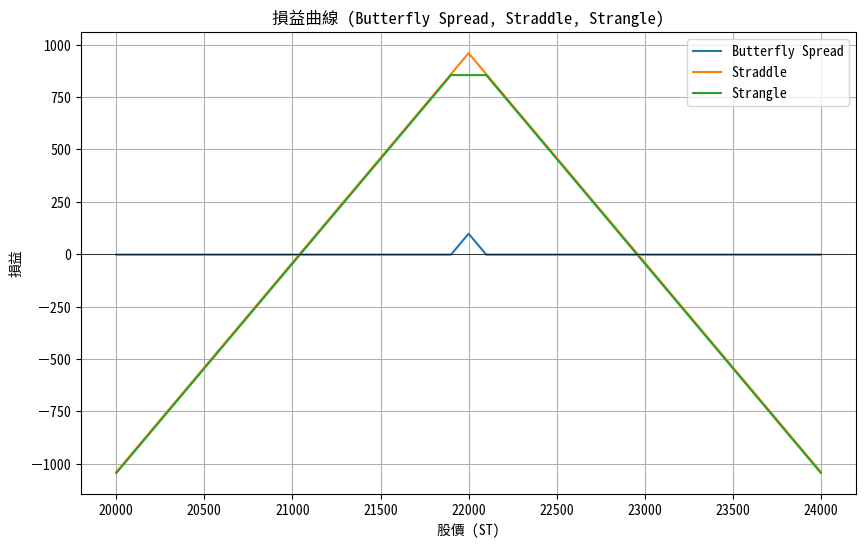

In [65]:
butterfly = [ [(21900, 1), (22000, -2), (22100, 1)], [] ]  #買一張低價和高價的買權、賣兩張中價的買權
straddle = [ [(22000, -1)], [(22000, -1)] ]
strangle = [ [(21900, -1)], [(22100, -1)] ]

# 計算各策略的損益
butterfly_profit = OptionProfit(butterfly, ST)
straddle_profit = OptionProfit(straddle, ST)
strangle_profit = OptionProfit(strangle, ST)

# 繪製損益曲線
plt.figure(figsize=(10, 6))
plt.plot(ST, butterfly_profit, label='Butterfly Spread')
plt.plot(ST, straddle_profit, label='Straddle')
plt.plot(ST, strangle_profit, label='Strangle')
plt.axhline(0, color='black',linewidth=0.5)
plt.title('損益曲線 (Butterfly Spread, Straddle, Strangle)')
plt.xlabel('股價 (ST)')
plt.ylabel('損益')
plt.legend()
plt.grid(True)
plt.show()

計算出此選擇權的 delta 值

In [77]:
import math
from scipy.stats import norm

def blsprice(S,K,T,r,vol):
  d1 = (math.log(S/K)+(r+vol**2/2)*T)/(vol*math.sqrt(T))
  d2 = d1 - vol*math.sqrt(T)
  call = S * norm.cdf(d1) - K * math.exp(-r*T) * norm.cdf(d2)
  return call

def BisectionBLS(S,K,T,r,call):
  left = 0.00000001
  right = 1
  while (right-left >=0.00001):
    mid = (left+right)/2
    if (blsprice(S,K,T,r,mid)-call) * (blsprice(S,K,T,r,left)-call) < 0:
      right = mid
    else:
      left = mid
  return (left+right)/2

S = 21894.37
K = 21900
T = 27/365
r = 0.01725
call = 515
vol = BisectionBLS(S,K,T,r,call)
print("合理的 volatility:",vol)

ds = 0.0001
delta = (blsprice(S+ds,K,T,r,vol)-blsprice(S-ds,K,T,r,vol))/(2*ds)
print("Delta 值:",delta)

合理的 volatility: 0.21220017267292018
Delta 值: 0.5185487589187687


畫出 volatility smile

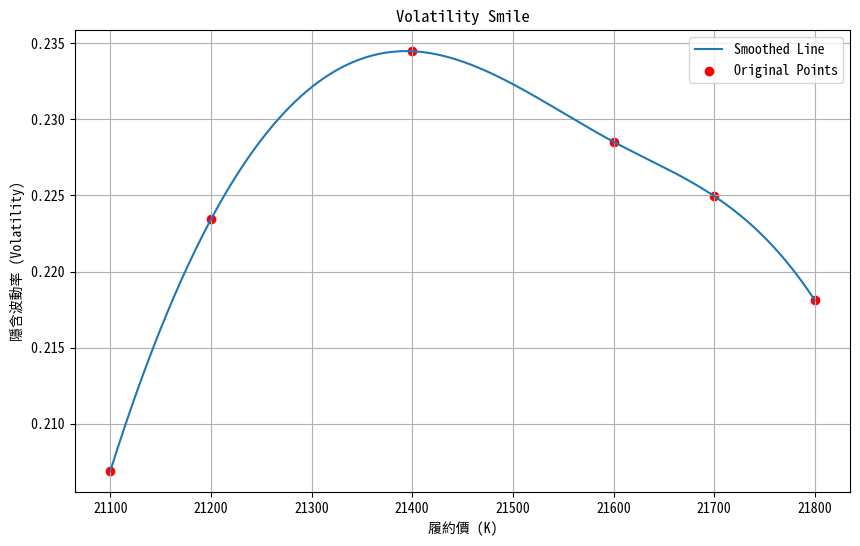

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d

CALLprice = {21100:1000, 21200:960, 21400:850, 21600:715, 21700:650, 21800:580}

S = 21894.37
T = 27/365
r = 0.01725


strike_prices = []
volatilities = []
for K, price in CALLprice.items():
    vol = BisectionBLS(S, K, T, r, price)
    strike_prices.append(K)
    volatilities.append(vol)


strike_prices_new = np.linspace(min(strike_prices), max(strike_prices), 500)
smooth_volatility = interp1d(strike_prices, volatilities, kind='cubic')

plt.figure(figsize=(10, 6))
plt.plot(strike_prices_new, smooth_volatility(strike_prices_new), label='Smoothed Line')
plt.scatter(strike_prices, volatilities, color='red', label='Original Points')
plt.title('Volatility Smile')
plt.xlabel('履約價 (K)')
plt.ylabel('隱含波動率 (Volatility)')
plt.grid(True)
plt.legend()


plt.show()
